## 中心極限定理

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import numpy.random as rd
import matplotlib.mlab as mlab
import scipy.stats as st

In [32]:
n = 10000
sample_size = 10000

# サンプルごとの平均、分散を算出
def sample_to_mean_var(sample):
    mean = np.mean(sample)
    var = np.var(sample)
    return [mean, var]

# 平均、分散のヒストグラムを描画する関数
def plot_mean_var(stats, dist_name=''):
    mean = stats[:, 0]
    var = stats[:, 1]
    bins = 40
    
    # 標本平均のヒストグラム
    plt.figure(figsize=(8,4))
    plt.hist(mean, bins=bins, density=True, color='plum')
    plt.title('mean from %s distribution' % (dist_name))
    plt.show()
    
    # 標本分散のヒストグラム
    plt.figure(figsize=(8, 4))
    plt.hist(var, bins=bins, color='green', density=True)
    plt.title('var from %s distribution' % (dist_name))
    plt.show()
    
def plot_dist(data, bins, title=''):
    plt.figure(figsize=(8,4))
    plt.title(title)
    plt.hist(data, bins, color='blue', density=True)
    plt.show()

## 指数分布
$ \lambda $ を0.1 として, 10,000個のサンプル生成

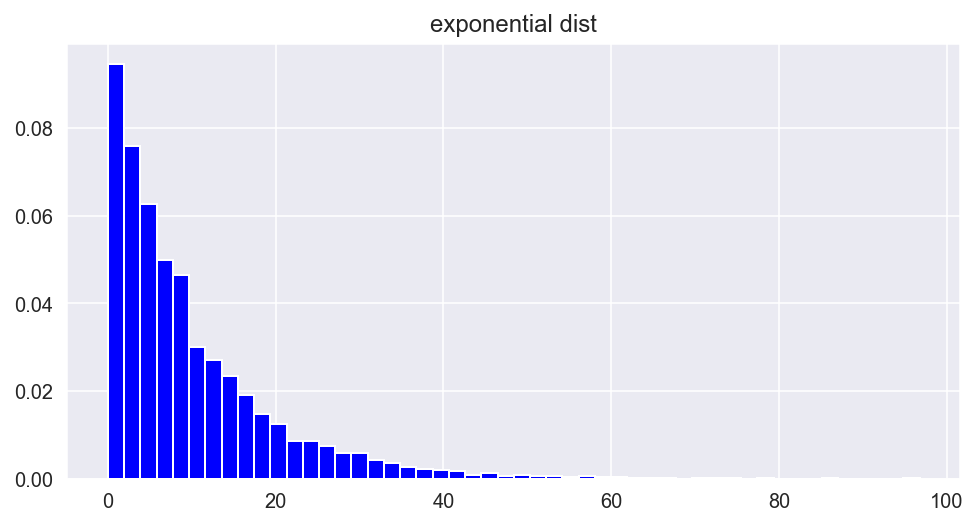

In [33]:
lam = 0.1
x = rd.exponential(1./lam, size=sample_size)
plot_dist(x, 50, 'exponential dist')

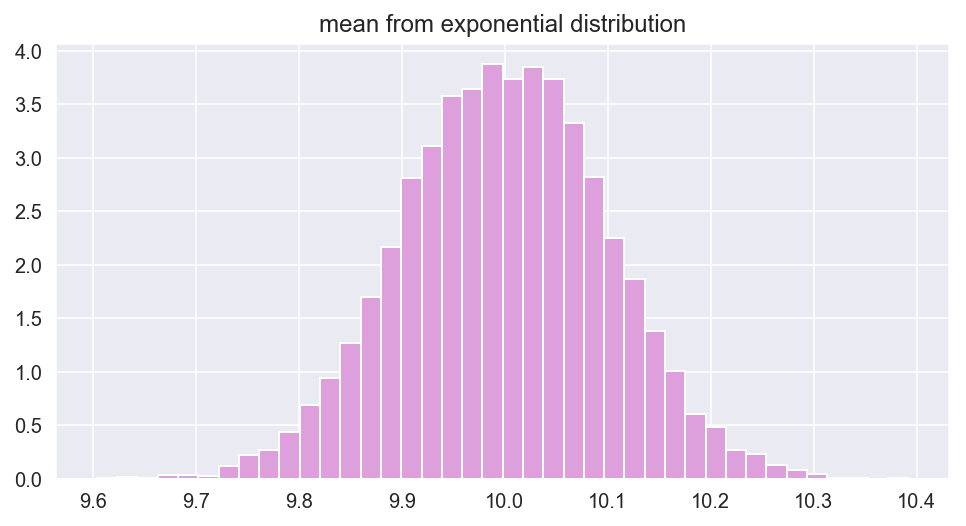

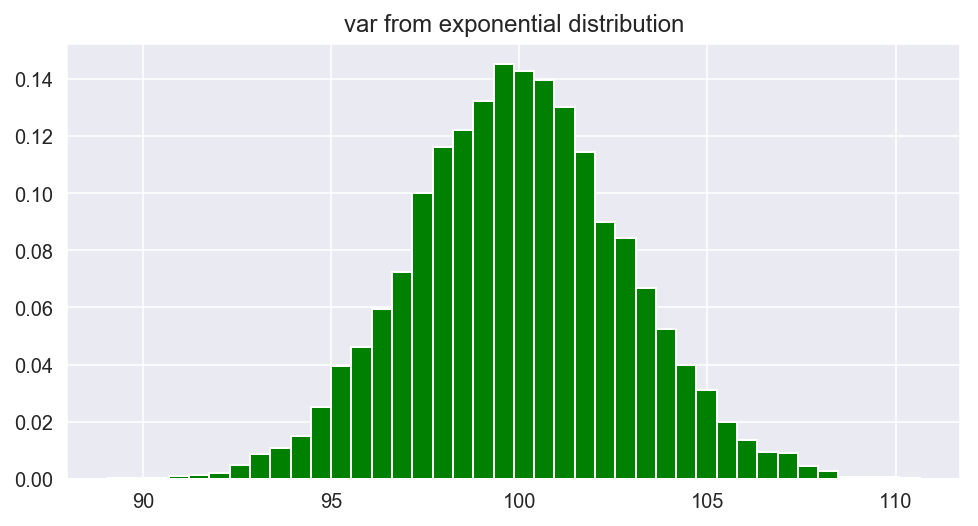

In [34]:
# 10,000個のサンプルを1セットとして、ここから標本平均、標本分散を算出する。
# これを10,000回繰り返して、その標本平均、標本分散のヒストグラムを書く

n = 10000
lam = 0.1
stats = np.array([sample_to_mean_var(rd.exponential(1./lam, size=sample_size))\
                    for i in range(n)])
plot_mean_var(stats, dist_name='exponential')

元の分布（指数関数）は、歪んでいたが、標本平均、標本分散は、左右対象の正規分布に従った形になってる。=> 中心極限定理

## カイ二乗分布

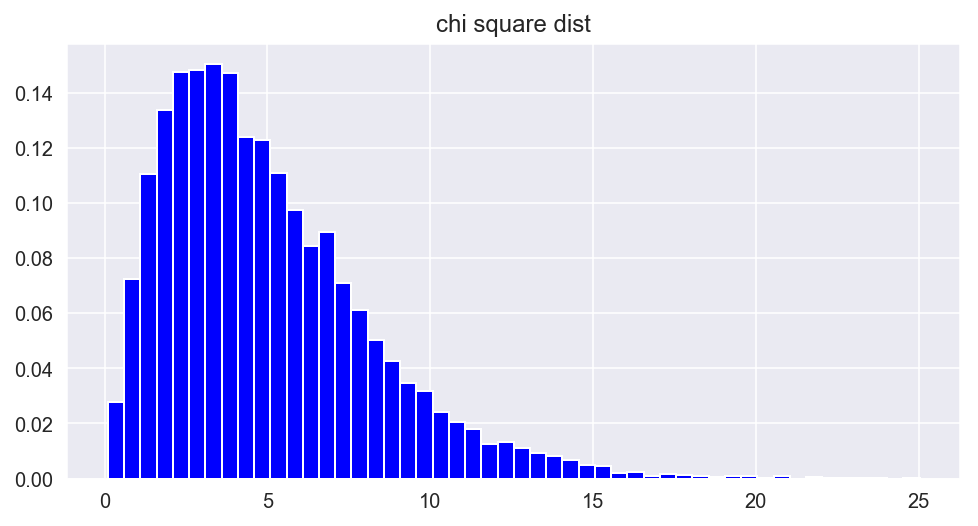

In [35]:
# 自由度=5 のカイ二乗分布
df = 5
x = rd.chisquare(df, sample_size)
plot_dist(x, 50, 'chi square dist')

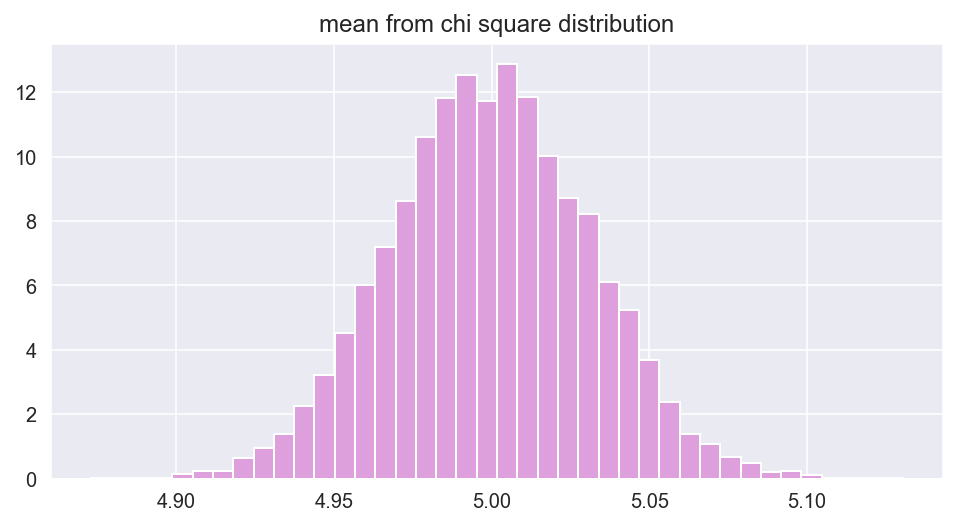

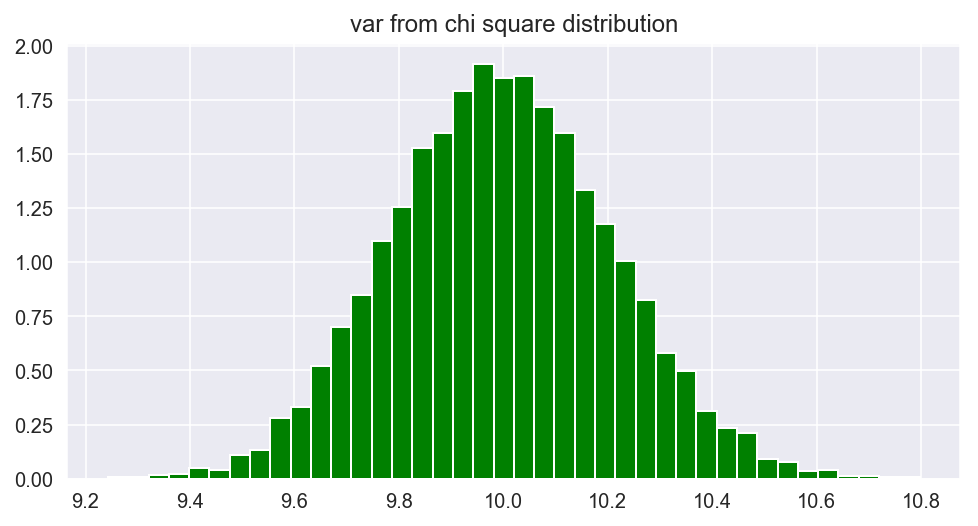

In [36]:
# カイ二乗分布の平均、分散のヒストグラム
df = 5 

chi_stats = np.array([sample_to_mean_var(rd.chisquare(df, sample_size))\
                          for i in range(n)])
plot_mean_var(chi_stats, dist_name='chi square')

## 双峰正規分布

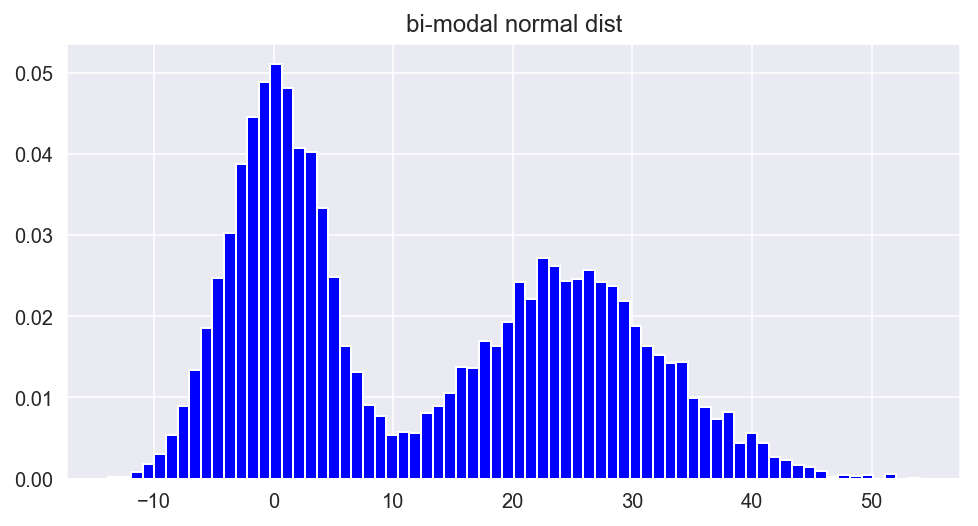

In [41]:
def generate_bimodal_norm():
    x = np.random.normal(0, 4, int(sample_size/2))
    y = np.random.normal(25, 8, int(sample_size/2))
    return np.append(x, y)

z = generate_bimodal_norm()
plot_dist(z, 70, 'bi-modal normal dist')

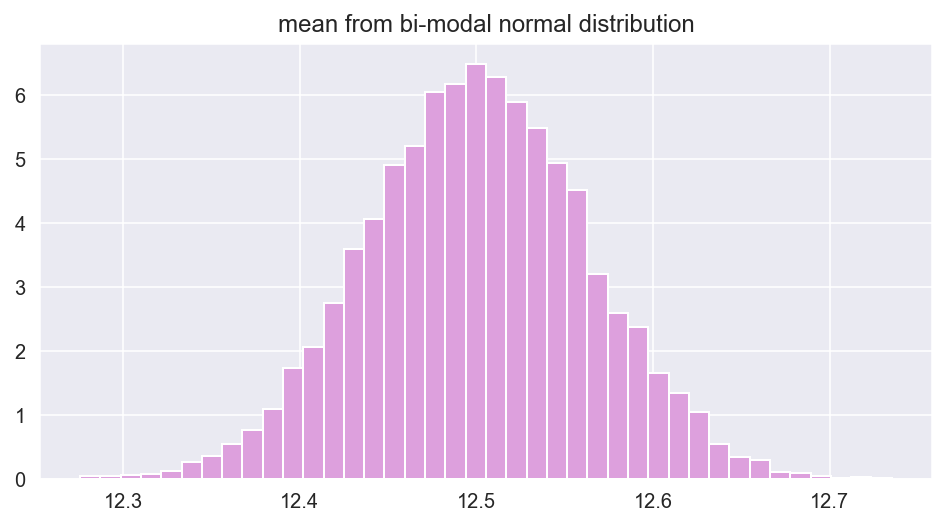

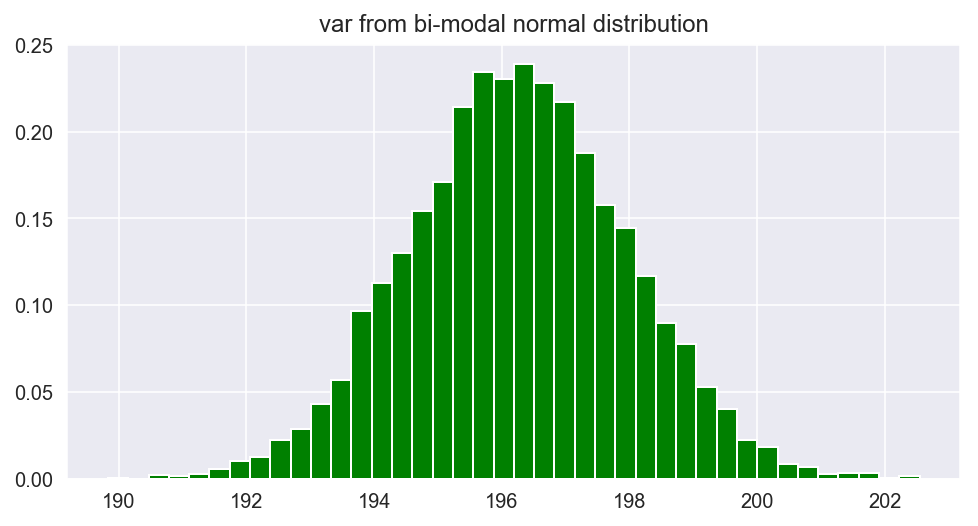

In [42]:
binorm_stats = np.array([sample_to_mean_var(generate_bimodal_norm()) \
                            for i in range(n)])
plot_mean_var(binorm_stats, dist_name='bi-modal normal')